# Multi Armed Bandit Problem

Multi-armed bandit (MAB) problem is one of the classical problems in reinforcement learning. A multi-armed bandit is actually a slot machine, a gambling game played in a casino where you pull the arm(lever) and get a payout(reward) based on some randomly generated probability distribution.  A single slot machine is called one-armed bandit and when there are multiple slot machines it is called as multi-armed bandits or k-armed bandits. Multi-armed bandits are shown below,

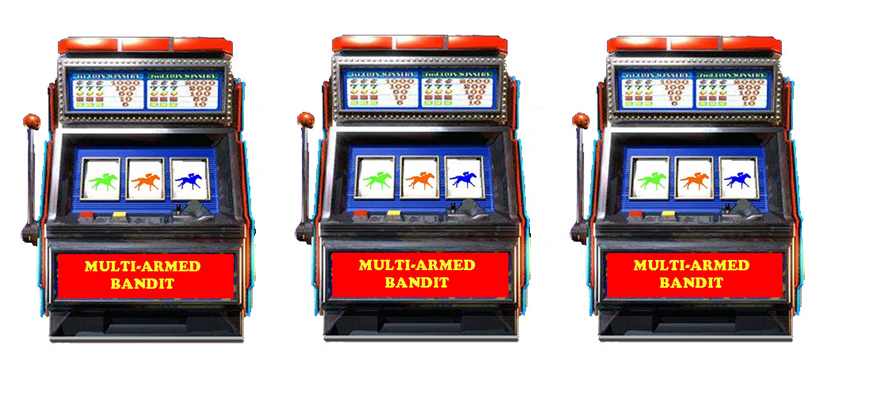

In [4]:
from IPython.display import Image
Image(filename='images/B09792_06_01.png')

As each slot machine gives us the reward from its own probability distribution, our goal is to find out which slot machine will give us the maximum cumulative reward over a sequence of time.So at each time step t, the agent performs an action i.e pulls an arm from the slot machine and receives a reward  and goal of our agent is to maximize the cumulative reward. 

We define the value of an arm Q(a) as average rewards received by pulling the arm, 

$$Q(a) = \frac{Sum \,of \,rewards \,\,received \,from \,the \,arm}{Total\, number \,of \,times \,the \,arm \,was \,pulled} $$

So the optimal arm is the one which gives us maximum cumulative reward i.e 

$$Q(a^*)= Max \; Q(a) $$

The goal of our agent is to find the optimal arm and also to minimize the regret which can be defined as the cost of knowing which of the k arms is optimal. Now how do we find the best arm? Whether we should explore all the arms or choose the arm which already gives us a maximum cumulative reward? Here comes exploration-exploitation dilemma. Now we will see how to solve this dilemma using various exploration strategies as follows,

1. Epsilon-greedy policy
2. Softmax exploration
3. Upper Confidence bound algorithm
4. Thomson sampling technique

First let us import the libraries,

In [1]:
import gym_bandits
import gym
import numpy as np
import math
import random
env = gym.make("BanditTenArmedGaussian-v0")

In [2]:
env.action_space

Discrete(10)

 Now, let us initialize all the necessary variables

In [30]:
# number of rounds (iterations)
num_rounds = 2000

# Count of number of times an arm was pulled
count = np.zeros(10)

# Sum of rewards of each arm
sum_rewards = np.zeros(10)

# Q value which is the average reward
Q = np.zeros(10)

### Epsilon-Greedy Policy

In [31]:
def epsilon_greedy(epsilon):
    
    rand = np.random.random()  
    if rand < epsilon:
        action =  env.action_space.sample()
    else:
        action = np.argmax(Q)
    
    return action

 Start pulling the arm!!!!!!!!

In [32]:
for i in range(num_rounds):
    
    # Select the arm using epsilon greedy 
    arm = epsilon_greedy(0.1)
    
    # Get the reward
    observation, reward, done, info = env.step(arm) 
    
    # update the count of that arm
    count[arm] += 1
    
    # Sum the rewards obtained from the arm
    sum_rewards[arm]+=reward
    
    # calculate Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]

print( 'The optimal arm is {}'.format(np.argmax(Q)))

The optimal arm is 8


### Softmax Exploration

In [33]:
def softmax(tau):
    
    total = sum([math.exp(val/tau) for val in Q])    
    probs = [math.exp(val/tau)/total for val in Q]
    
    threshold = random.random()
    cumulative_prob = 0.0
    for i in range(len(probs)):
        cumulative_prob += probs[i]
        if (cumulative_prob > threshold):
            return i
    return np.argmax(probs) 
    

 Now, let us initialize all the necessary variables

In [35]:
# number of rounds (iterations)
num_rounds = 2000

# Count of number of times an arm was pulled
count = np.zeros(10)

# Sum of rewards of each arm
sum_rewards = np.zeros(10)

# Q value which is the average reward
Q = np.zeros(10)

 Start pulling the arm!!!!!!!!

In [36]:
for i in range(num_rounds):
    
    # Select the arm using softmax
    arm = softmax(0.5)
    
    # Get the reward
    observation, reward, done, info = env.step(arm) 
    
    # update the count of that arm
    count[arm] += 1
    
    # Sum the rewards obtained from the arm
    sum_rewards[arm]+=reward
    
    # calculate Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]
    
print( 'The optimal arm is {}'.format(np.argmax(Q)))

The optimal arm is 8


### Upper Confidence Bound

In [37]:
def UCB(iters):
    
    ucb = np.zeros(10)
    
    #explore all the arms
    if iters < 10:
        return i
    
    else:
        for arm in range(10):
            
            # calculate upper bound
            upper_bound = math.sqrt((2*math.log(sum(count))) / count[arm])
            
            # add upper bound to the Q valyue
            ucb[arm] = Q[arm] + upper_bound
            
        # return the arm which has maximum value
        return (np.argmax(ucb))

 Now, let us initialize all the necessary variables

In [38]:
# number of rounds (iterations)
num_rounds = 2000

# Count of number of times an arm was pulled
count = np.zeros(10)

# Sum of rewards of each arm
sum_rewards = np.zeros(10)

# Q value which is the average reward
Q = np.zeros(10)

 Start pulling the arm!!!!!!!!

In [39]:
for i in range(num_rounds):
    
    # Select the arm using UCB
    arm = UCB(i)
    
    # Get the reward
    observation, reward, done, info = env.step(arm) 
    
    # update the count of that arm
    count[arm] += 1
    
    # Sum the rewards obtained from the arm
    sum_rewards[arm]+=reward
    
    # calculate Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]
    
print( 'The optimal arm is {}'.format(np.argmax(Q)))

The optimal arm is 8


### Thompson Sampling 

In [40]:
def thompson_sampling(alpha,beta):
    
    samples = [np.random.beta(alpha[i]+1,beta[i]+1) for i in range(10)]

    return np.argmax(samples)

 Now, let us initialize all the necessary variables

In [41]:
# number of rounds (iterations)
num_rounds = 2000

# Count of number of times an arm was pulled
count = np.zeros(10)

# Sum of rewards of each arm
sum_rewards = np.zeros(10)

# Q value which is the average reward
Q = np.zeros(10)

# initialize alpha and beta values
alpha = np.ones(10)
beta = np.ones(10)

 Start pulling the arm!!!!!!!!

In [42]:
for i in range(num_rounds):
    
    # Select the arm using thompson sampling
    arm = thompson_sampling(alpha,beta)
    
    # Get the reward
    observation, reward, done, info = env.step(arm) 
    
    # update the count of that arm
    count[arm] += 1
    
    # Sum the rewards obtained from the arm
    sum_rewards[arm]+=reward
    
    # calculate Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]

    # If it is a positive reward increment alpha
    if reward >0:
        alpha[arm] += 1
        
    # If it is a negative reward increment beta
    else:
        beta[arm] += 1
    
print( 'The optimal arm is {}'.format(np.argmax(Q)))

The optimal arm is 8


In [ ]:
THE END